# ActionRecognition

# 데이터 불러오기

In [16]:
import json
import pandas as pd
path = '../../dataset/somethingv2/document/labels.json'
with open(path,'r') as json_file :
    label_dic = json.load(json_file)
# 훈련 데이터 불러오기
path = '../../dataset/somethingv2/document/train.json'
with open(path,'r') as json_file :
    json_temp = json.load(json_file)
    train_pd = pd.json_normalize(json_temp)
# 테스트 데이터 불러오기
path = '../../dataset/somethingv2/document/test.json'
with open(path,'r') as json_file :
    json_temp = json.load(json_file)
    test_pd = pd.json_normalize(json_temp)
# validation 데이터 불러오기
path = '../../dataset/somethingv2/document/validation.json'
with open(path,'r') as json_file :
    json_temp = json.load(json_file)
    validation_pd = pd.json_normalize(json_temp)
# 라벨을 한글로
path = '../../dataset/somethingv2/document/transLabels.json'
with open(path,'r') as json_file :
    trans_labels_dict = json.load(json_file)
# test 정답 데이터 불러오기
test_answer_pd = pd.read_csv("../../dataset/somethingv2/document/test-answers.csv",sep=';',names=["id","label"])

In [17]:
test_answer_pd

,id,label
0,208583,Moving something closer to something
1,50058,Stacking number of something
2,139625,Putting something similar to other things that...
3,40500,Rolling something on a flat surface
4,79958,Moving something across a surface without it f...
...,...,...
27152,161335,Letting something roll along a flat surface
27153,80251,Bending something so that it deforms
27154,95514,Poking something so lightly that it doesn't or...
27155,212574,Pretending to squeeze something


In [18]:
trans_labels_dict

{'Approaching something with your camera': 'X',
 'Attaching something to something': 'X',
 'Bending something so that it deforms': '구부리다',
 'Bending something until it breaks': '구부리다',
 'Burying something in something': 'X',
 'Closing something': '닫다',
 'Covering something with something': '덮다',
 'Digging something out of something': 'X',
 'Dropping something behind something': '떨어뜨리다',
 'Dropping something in front of something': '떨어뜨리다',
 'Dropping something into something': '떨어뜨리다',
 'Dropping something next to something': '떨어뜨리다',
 'Dropping something onto something': '떨어뜨리다',
 'Failing to put something into something because something does not fit': 'X',
 'Folding something': 'X',
 'Hitting something with something': '때리다',
 'Holding something': '잡고 있다',
 'Holding something behind something': '잡고 있다',
 'Holding something in front of something': '잡고 있다',
 'Holding something next to something': '잡고 있다',
 'Holding something over something': '잡고 있다',
 'Laying something on the table on

# train 데이터 준비하기

In [19]:
from sklearn import preprocessing
trans_labels = list(set(trans_labels_dict.values()))
le = preprocessing.LabelEncoder()
le.fit(trans_labels)

LabelEncoder()

In [20]:
len(le.classes_)

22

In [21]:
le.transform(["X"])

array([0])

In [22]:
import re
import pandas as pd
from sklearn import preprocessing
train_trans_label_list = []
for data in train_pd["template"]:
    train_trans_label_list.append(trans_labels_dict[re.sub("[\[\]]","",data)])

train_trans_label_list = le.transform(train_trans_label_list)

train_path_list = []
path = '../../dataset/somethingv2/video2/'
for data in train_pd["id"]:
    train_path_list.append(path+data+".mp4")

train_pd["path"] = train_path_list
train_pd["korean_label"] = train_trans_label_list
train_csv = train_pd.loc[train_pd["korean_label"]!=0,["path","korean_label"]]
train_csv.to_csv("./trainTestValData/train2.csv",index=False,header=False)

# validation 데이터 준비하기

In [23]:
import re
import pandas as pd
val_trans_label_list = []
for data in validation_pd["template"]:
    val_trans_label_list.append(trans_labels_dict[re.sub("[\[\]]","",data)])

val_trans_label_list = le.transform(val_trans_label_list)
val_path_list = []
path = '../../dataset/somethingv2/video2/'
for data in validation_pd["id"]:
    val_path_list.append(path+data+".mp4")

validation_pd["path"] = val_path_list
validation_pd["korean_label"] = val_trans_label_list
val_csv = validation_pd.loc[validation_pd["korean_label"] != 0, ["path","korean_label"]]
val_csv.to_csv("./trainTestValData/val2.csv",index=False,header=False)

# test 데이터 준비하기

In [24]:
import re
import pandas as pd

test_path_list = []
path = '../../dataset/somethingv2/video2/'
for data in test_pd["id"]:
    test_path_list.append(path+data+".mp4")

test_trans_label_list = [trans_labels_dict[data] for data in test_answer_pd["label"]]
test_trans_label_list = le.transform(test_trans_label_list)
test_pd["path"] = test_path_list
test_pd["korean_label"] = test_trans_label_list
test_csv = test_pd.loc[test_pd["korean_label"]!= 0,["path","korean_label"]]
test_csv.to_csv("./trainTestValData/test2.csv",index=False,header=False)

In [25]:
train_csv["korean_label"].value_counts()

4     19777
19    15516
16    13098
12     8333
3      8254
8      7015
20     6894
10     5823
7      4765
14     4680
5      3382
21     3021
9      2727
18     2726
11     2527
17     2014
6      1976
2      1800
13     1738
15     1471
1      1295
Name: korean_label, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

<AxesSubplot:xlabel='count', ylabel='korean_label'>

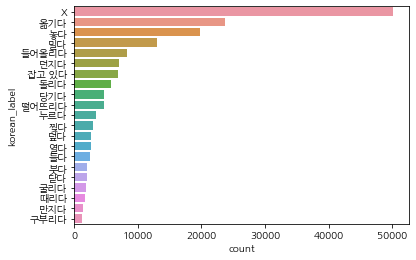

In [9]:
import seaborn as sns

sns.countplot(y="korean_label",data=train_pd,order = train_pd["korean_label"].value_counts().index)

In [17]:
train_pd["korean_label"].value_counts()

X        50081
놓다       19777
옮기다      15516
밀다       13098
들어올리다     8333
넣다        8254
던지다       7015
잡고 있다     6894
돌리다       5823
당기다       4765
떨어뜨리다     4680
누르다       3382
찢다        3021
덮다        2727
열다        2726
들다        2527
붓다        2014
닫다        1976
굴리다       1800
때리다       1738
만지다       1471
구부리다      1295
Name: korean_label, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

<AxesSubplot:xlabel='count', ylabel='korean_label'>

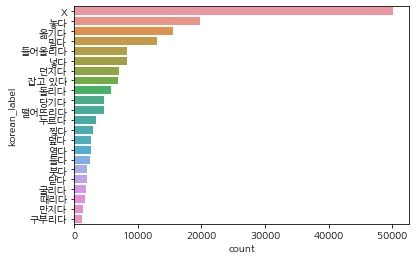

In [19]:
import seaborn as sns

sns.countplot(y="korean_label",data=train_pd,order = train_pd["korean_label"].value_counts().index)

In [ ]:
!OUTPUT_DIR='./ssv2_videomae_pretrain_base_patch16_224_frame_16x2_tube_mask_ratio_0.9_e800/eval_lr_5e-4_epoch_50'\
DATA_PATH='./list_ssv2'\
MODEL_PATH='./ssv2_videomae_pretrain_base_patch16_224_frame_16x2_tube_mask_ratio_0.9_e800/checkpoint-799.pth'\
run_class_finetuning.py \
--model vit_base_patch16_224 \
--data_set SSV2 \
--nb_classes 174 \
--data_path ${DATA_PATH} \
--finetune ${MODEL_PATH} \
--log_dir ${OUTPUT_DIR} \
--output_dir ${OUTPUT_DIR} \
--batch_size 8 \
--num_sample 1 \
--input_size 224 \
--short_side_size 224 \
--save_ckpt_freq 10 \
--num_frames 16 \
--opt adamw \
--lr 5e-4 \
--opt_betas 0.9 0.999 \
--weight_decay 0.05 \
--epochs 50 \
--dist_eval \
--test_num_segment 2 \
--test_num_crop 3 \
--enable_deepspeed 